<a href="https://colab.research.google.com/github/Acarino19/DATA-201/blob/main/Police_Arrest_dataset_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/Acarino19/DATA-201/main/NYPD_Arrest_Data__Year_to_Date_.csv')

In [39]:
#attempt at droping null values
df1 = df.dropna()

In [38]:
df1.head(7)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
6,233952333,09/23/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,F,K,75,0,18-24,M,BLACK,1017119,183909,40.671412,-73.881512,POINT (-73.88151172399995 40.67141166300007)
7,233878488,09/21/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211300,F,B,40,0,25-44,M,WHITE,1010679,234533,40.810383,-73.904528,POINT (-73.90452841699994 40.81038342800008)


# Research question:

*Which borough in NYC has the highest number of offenses and which borough has the highest number of robbery offenses?





In [27]:
#keep only certain columns
df2 = df[['OFNS_DESC','ARREST_BORO', 'PERP_RACE']]

In [28]:
df2.head()

,OFNS_DESC,ARREST_BORO,PERP_RACE
0,FELONY ASSAULT,B,BLACK
1,RAPE,K,BLACK
2,FELONY ASSAULT,Q,BLACK
3,ASSAULT 3 & RELATED OFFENSES,B,BLACK
4,ASSAULT 3 & RELATED OFFENSES,B,BLACK


In [8]:
df2.describe()

,OFNS_DESC,ARREST_BORO,PERP_RACE
count,115238,115299,115299
unique,63,5,7
top,ASSAULT 3 & RELATED OFFENSES,K,BLACK
freq,19937,31004,57011


In [9]:
#rename columns for easier work
df3= df2.rename(columns={"OFNS_DESC": "OFFENSE", "ARREST_BORO": "BOROUGH", "PERP_RACE": "RACE"})

In [10]:
df3.head()

,OFFENSE,BOROUGH,RACE
0,FELONY ASSAULT,B,BLACK
1,RAPE,K,BLACK
2,FELONY ASSAULT,Q,BLACK
3,ASSAULT 3 & RELATED OFFENSES,B,BLACK
4,ASSAULT 3 & RELATED OFFENSES,B,BLACK


In [11]:
#count number of cases per individual borough
df3.groupby(['BOROUGH'])['OFFENSE'].count().sort_values(ascending=False)

BOROUGH
K    30988
M    28928
B    25304
Q    24638
S     5380
Name: OFFENSE, dtype: int64

In [12]:
#reorder data from highest to lowest, although i wasnt able to get every value listed
df3.groupby(['OFFENSE'])['OFFENSE'].count().sort_values(ascending=False)

OFFENSE
ASSAULT 3 & RELATED OFFENSES       19937
FELONY ASSAULT                     11472
PETIT LARCENY                       9132
DANGEROUS DRUGS                     8163
MISCELLANEOUS PENAL LAW             7629
                                   ...  
PARKING OFFENSES                       2
FELONY SEX CRIMES                      2
ADMINISTRATIVE CODES                   2
NEW YORK CITY HEALTH CODE              1
KIDNAPPING AND RELATED OFFENSES        1
Name: OFFENSE, Length: 63, dtype: int64

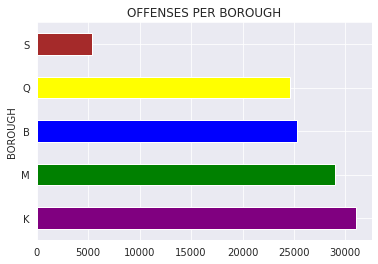

In [32]:
#create barplot to display a visuallization of the number of offenses per borough. Legend: S = Staten Island, Q = Queens, B = Bronx, M = Manhattan, K = Brooklyn

df3['BOROUGH'].value_counts().plot(kind='barh', title="OFFENSES PER BOROUGH", xlabel= 'BOROUGH', ylabel= 'ARRESTS', color=['Purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

The above graph shows that **Brooklyn** has the highest number of offenses.

# **Displaying by race** (extra)

In [15]:
#for curiosity purposes, i wanted to see the number of offenses by race
df3.groupby(['RACE'])['OFFENSE'].count().sort_values(ascending=False)

RACE
BLACK                             56985
WHITE HISPANIC                    28341
WHITE                             12583
BLACK HISPANIC                    10197
ASIAN / PACIFIC ISLANDER           6382
UNKNOWN                             431
AMERICAN INDIAN/ALASKAN NATIVE      319
Name: OFFENSE, dtype: int64

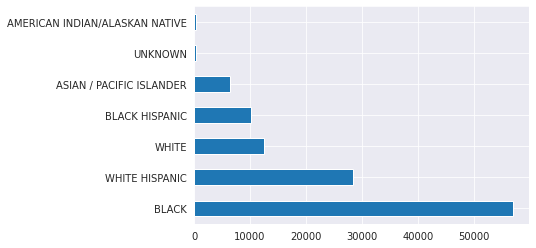

In [14]:
#barplot showing offenses per race category
df3['RACE'].value_counts().plot(kind='barh')

# **Which borough has the highest number of robbery offenses:**




In [16]:
# Next step was to filter out everything other offense except robbery
df3.query("OFFENSE == 'ROBBERY'")

,OFFENSE,BOROUGH,RACE
6,ROBBERY,K,BLACK
9,ROBBERY,K,BLACK
20,ROBBERY,K,BLACK
57,ROBBERY,K,BLACK
63,ROBBERY,B,BLACK
...,...,...,...
115129,ROBBERY,M,ASIAN / PACIFIC ISLANDER
115154,ROBBERY,B,BLACK
115224,ROBBERY,M,BLACK
115240,ROBBERY,Q,BLACK


In [31]:
#create new roberry dataset
dfr= df3[df3['OFFENSE'] == 'ROBBERY'] 
dfr.head()

,OFFENSE,BOROUGH,RACE
6,ROBBERY,K,BLACK
9,ROBBERY,K,BLACK
20,ROBBERY,K,BLACK
57,ROBBERY,K,BLACK
63,ROBBERY,B,BLACK


In [19]:
#count values for robbery offenses per borough
dfr.groupby(['BOROUGH'])['OFFENSE'].count().sort_values(ascending=False)

BOROUGH
K    1551
M    1524
B    1477
Q    1031
S     123
Name: OFFENSE, dtype: int64

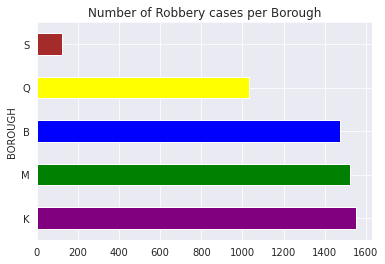

In [20]:
# barplot for robbery cases per borough. Legend: S = Staten Island, Q = Queens, B = Bronx, M = Manhattan, K = Brooklyn
dfr['BOROUGH'].value_counts().plot(kind='barh', title="Number of Robbery cases per Borough", xlabel= 'BOROUGH', ylabel= 'ARRESTS', color=['Purple','green', 'blue', 'yellow', 'brown'])
sns.set_style("darkgrid")

The above graph shows that **Brooklyn** has the highest number of **robbery** offenses.

#  **Filtering by race(extra)**

In [23]:
dfr.groupby(['RACE'])['OFFENSE'].count().sort_values(ascending=False)

RACE
BLACK                             3307
WHITE HISPANIC                    1264
BLACK HISPANIC                     581
WHITE                              359
ASIAN / PACIFIC ISLANDER           165
UNKNOWN                             20
AMERICAN INDIAN/ALASKAN NATIVE      10
Name: OFFENSE, dtype: int64

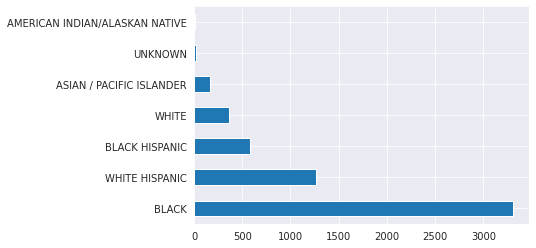

In [36]:
dfr['RACE'].value_counts().plot(kind='barh')

**Conclusion:** From this analysis and statistical data, I was able to find that out of the five borough of New York City, Brooklyn had the highest number of arrests/offenses. Brooklyn also had the highest number of robbery cases. 